## Welcome to my first project. 

##### In this project i used kaggle Titanic dataset to analysis and visualize the data using Python.

##### Analytical questions on Titanic database :

###### 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc) 
###### 2.) What deck were the passengers on and how does that relate to their class? 
###### 3.) Where did the passengers come from? 
###### 4.) Who was alone and who was with family? 
###### 5.) What factors helped someone survive the sinking?
###### 6.) Did the deck have an effect on the passengers survival rate? 
###### 7.)  Did having a family member increase the odds of surviving the crash?

In [1]:
#IMPORTING BASIC LIB FOR DATA ANALYSING:NumPY , PANDAS

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#IMPORTED WARNING MOD JUST TO IGNORE WARNING,BECAUSE I'M WORKING ON OLDER VERSION.

import warnings
warnings.filterwarnings("ignore")

In [2]:
#USING PANDAS TO READ MY CSV FILE
tit_df=pd.read_csv('train.csv')

In [3]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#IMPORT SEABORN AND MATPLOTLIB FOR DATA VISUALIZATION. 'A GOOD PICTURE SPEAKS MORE THAN 1000 WORDS'

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#I'M USING JUPYTER NOTEBOOK.HENCE TO VIEW THE PLOTS, I'M USING THE COMMENT SHOWN BELOW:

%matplotlib inline

## Q1.Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

#### USED FACTORPLOT TO VISUALIZE THE COUNT OF PASSENGER BY GENDER

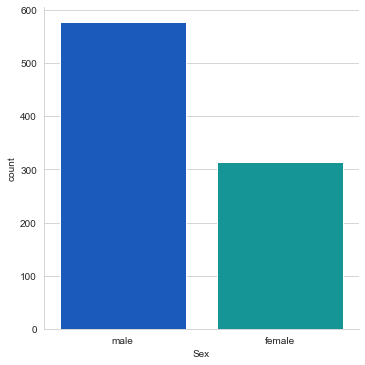

In [6]:
sns.factorplot('Sex',data=tit_df,kind='count',palette='winter')

#### Now we can see there were less females than male passengers

### Let's see the no of passengers from different Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton) 
#### This also answers the Q 3.Where did the passengers come from? Where did the passengers come from? 

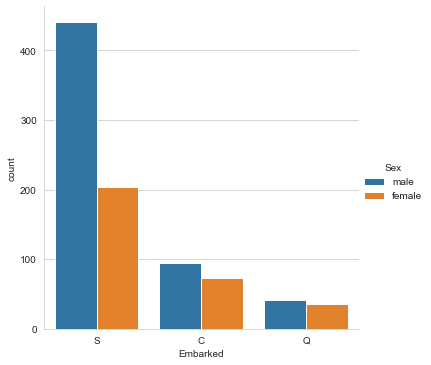

In [7]:
sns.factorplot('Embarked',data=tit_df,hue='Sex',kind='count')

#### Majority of passengers was from Port of Southampton 

### Let's create a new column 'Person' to categorious Child, Male, Female based on Age

In [8]:
def male_female_child(columns):
    age,sex=columns
    if age<16:
        return 'child'
    else:
        return sex
    
tit_df['Person']=tit_df[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
tit_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


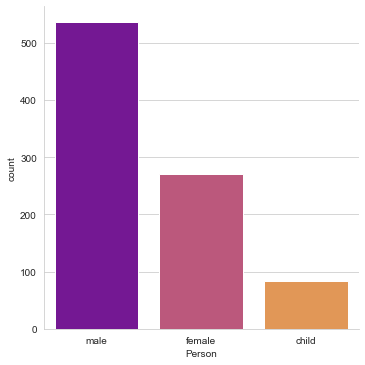

In [10]:
sns.factorplot('Person',data=tit_df,kind='count',palette='plasma')

### Let's explore ticket class

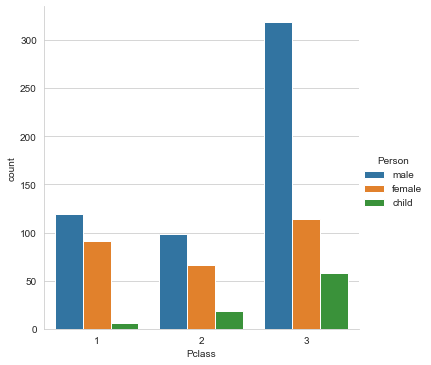

In [11]:
sns.factorplot('Pclass',data=tit_df,hue='Person',kind='count')

### Let's see passengers from different ports and their Class

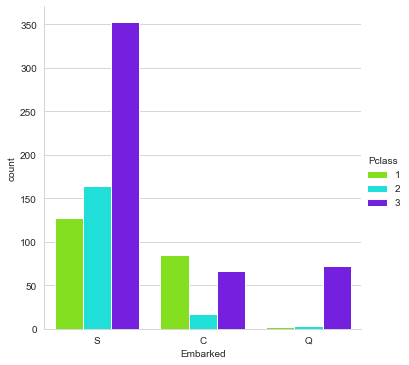

In [12]:
sns.factorplot('Embarked',data=tit_df,hue='Pclass',kind='count',palette='hsv')

#### It's interesting to see passengers from Queenstown in Class 1 , Class 2 was less compare to other ports. We could analysis Queenstown's economy status with further data.

### Age of passengers

<AxesSubplot:>

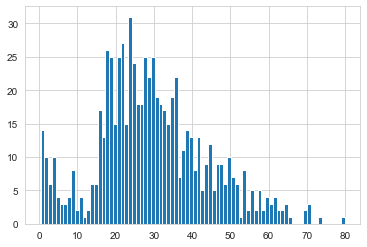

In [13]:
tit_df['Age'].hist(bins=80)

<AxesSubplot:xlabel='Age', ylabel='Density'>

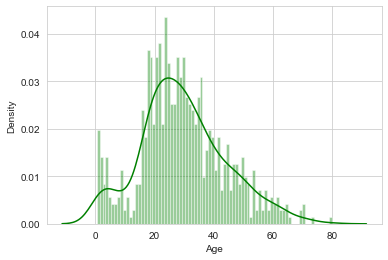

In [14]:
sns.distplot(tit_df['Age'],bins=80,color='green')

In [15]:
print('Average age ofe passenger is : {}'.format(round(tit_df["Age"].mean())))

Average age ofe passenger is : 30


In [16]:
tit_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

### Let's find the distribution of age

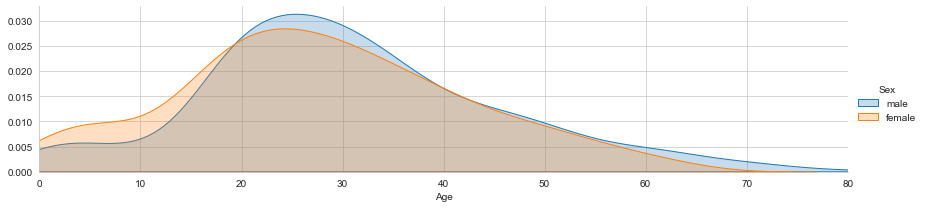

In [17]:
feg=sns.FacetGrid(tit_df,hue='Sex',aspect=4)

feg.map(sns.kdeplot,'Age',shade=True)

limit=tit_df['Age'].max()

feg.set(xlim=(0,limit))

feg.add_legend()

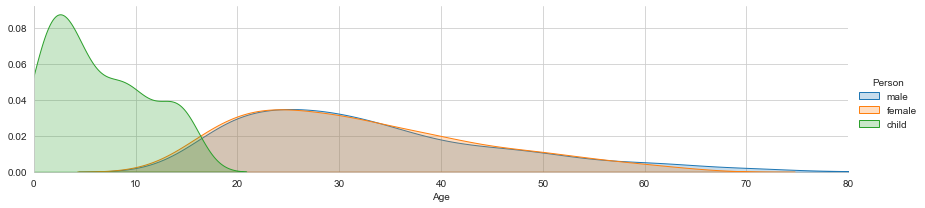

In [18]:
feg=sns.FacetGrid(tit_df,hue='Person',aspect=4)

feg.map(sns.kdeplot,'Age',shade=True)

limit=tit_df['Age'].max()

feg.set(xlim=(0,limit))

feg.add_legend()

### Q.2 What deck were the passengers on and how does that relate to their class? 

In [19]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


#### Cabin has more null values so let's drop null

In [20]:
deck=tit_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [22]:
label=[]
for d in deck:
    label.append(d[0])

In [23]:
deck_df=DataFrame(label)

In [24]:
deck_df.columns=['Cabin']

Exploring the passengers per deck

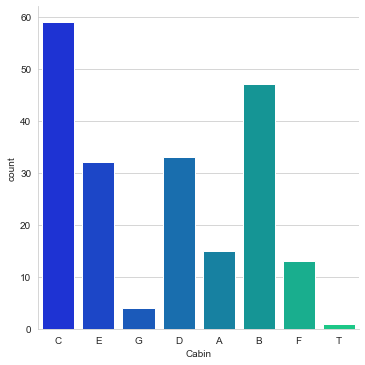

In [25]:
sns.factorplot('Cabin',data=deck_df,kind='count',palette='winter')

#### Deck C was occupied the most compare to other deck. Let's get rid fo Deck T, because it's count doesn't make sense

In [26]:
deck_df['Cabin']=deck_df[deck_df.Cabin != 'T']

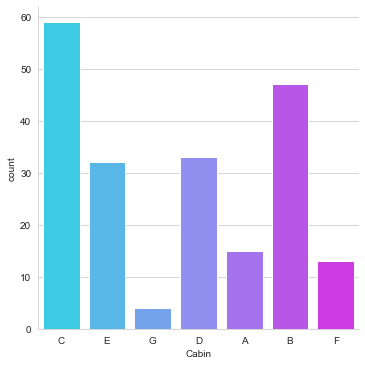

In [27]:
sns.factorplot('Cabin',data=deck_df,kind='count',palette='cool')

#### Comparing deck with Class

In [28]:
deck_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [29]:
deck_df['Class']=tit_df['Pclass']

In [30]:
deck_df

,Cabin,Class
0,C,3
1,C,1
2,E,3
3,G,1
4,C,3
...,...,...
199,D,2
200,B,3
201,C,3
202,B,3


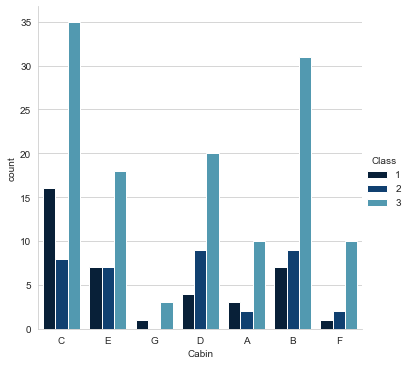

In [31]:
sns.factorplot('Cabin',data=deck_df,hue='Class',kind='count',palette='ocean')

### Q 4 . Who was alone and who was with family? 

In [32]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [33]:
# Creating new Column 'Alone'

tit_df['Alone']=tit_df['Parch']+tit_df['SibSp']

In [34]:
tit_df["Alone"].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [35]:
tit_df['Alone'].loc[tit_df['Alone']>0]='With family'
tit_df['Alone'].loc[tit_df['Alone']==0]='Alone'

In [36]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


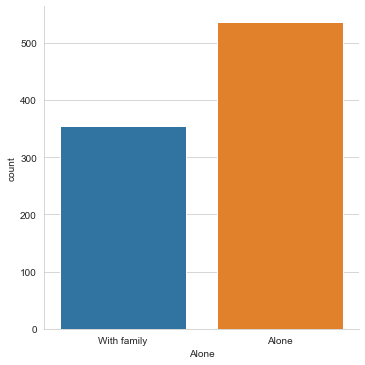

In [37]:
sns.factorplot('Alone',data=tit_df,kind='count')

#### Looks like more passengers boarded alone.

### Q.5 What factors helped someone survive the sinking?

In [38]:
# Creating new column

tit_df['Survivor']=tit_df["Survived"].map({0:'no',1:'yes'})

In [39]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


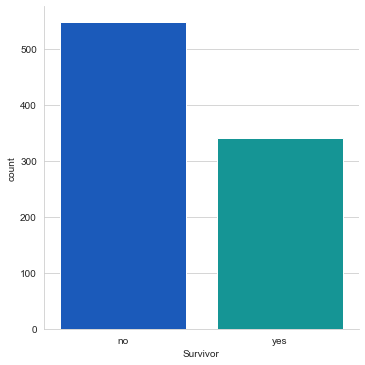

In [40]:
sns.factorplot('Survivor',data=tit_df,kind='count',palette='winter')

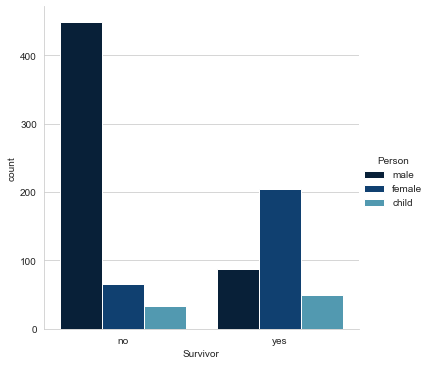

In [41]:
sns.factorplot('Survivor',data=tit_df,hue='Person',kind='count',palette='ocean')

#### Male survived less compare to child , female

### Passengers survived per Class

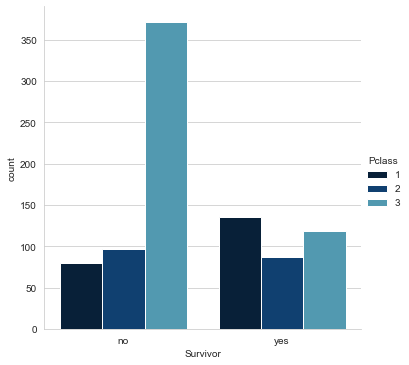

In [42]:
sns.factorplot('Survivor',data=tit_df,hue='Pclass',kind='count',palette='ocean')

#### Class 3 had more deaths

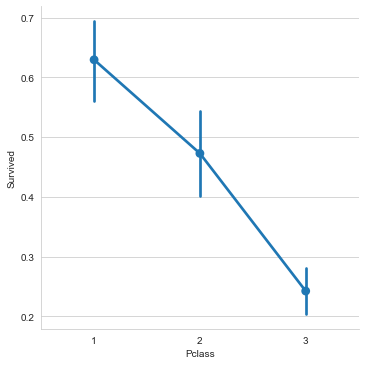

In [43]:
sns.factorplot('Pclass','Survived',data=tit_df)

#### We could concluded that passengers in Class 1 had much possibility tto survive

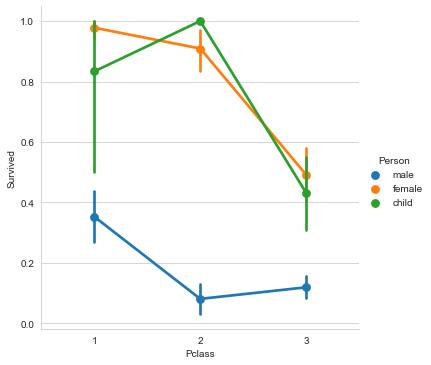

In [44]:
sns.factorplot('Pclass','Survived',hue='Person',data=tit_df)

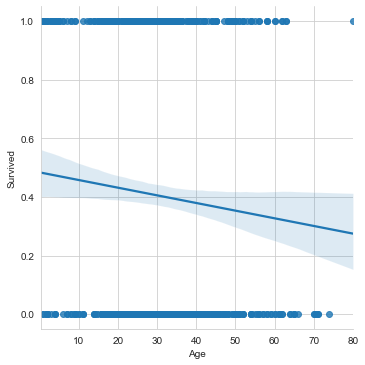

In [45]:
sns.lmplot('Age','Survived',data=tit_df,palette='plasma')

#### Survivial Rate decreases wiith increasing age

### Q 6. Did the deck have an effect on the passengers survival rate? 

In [46]:
deck_df.head()

,Cabin,Class
0,C,3
1,C,1
2,E,3
3,G,1
4,C,3


In [47]:
#Crete a new column 'Survived' in Deck dataframe

deck_df["Survived"]=tit_df['Survived']


In [48]:
deck_df.head()

,Cabin,Class,Survived
0,C,3,0
1,C,1,1
2,E,3,1
3,G,1,1
4,C,3,0


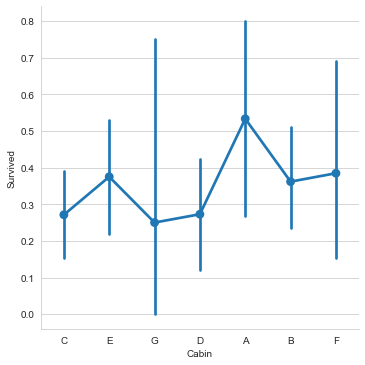

In [49]:
sns.factorplot('Cabin','Survived',data=deck_df)

#### Passengers in Deck A had more possibilities(percentage) to survive.

### To get number of passengers survived from each Deck

In [50]:
# Creating a new Dataframe

pas_per_deck_df=DataFrame(deck_df['Cabin'].value_counts())

In [51]:
pas_per_deck_df

,Cabin
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [52]:
#Creating new column to get the number of passengers survived

pas_per_deck_df['Survived']=deck_df['Survived'].groupby(deck_df['Cabin']).sum()

In [53]:
pas_per_deck_df

,Cabin,Survived
C,59,16
B,47,17
D,33,9
E,32,12
A,15,8
F,13,5
G,4,1


<BarContainer object of 7 artists>

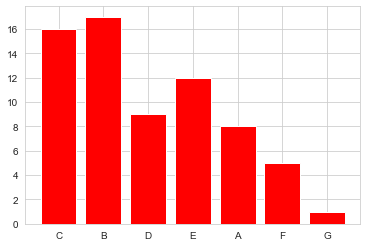

In [76]:
plt.bar(pas_per_deck_df.index,pas_per_deck_df["Survived"],color='red')

#### Deck B has most survived passengers : 17

### Q7. Did having a family member increase the odds of surviving the crash?

In [55]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [56]:
x=tit_df['Survived'].groupby(tit_df['Alone']).sum()

In [57]:
x

Alone
Alone          163
With family    179
Name: Survived, dtype: int64

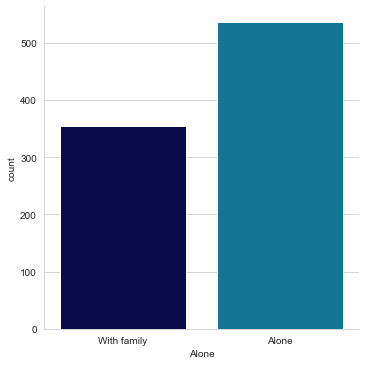

In [58]:
sns.factorplot("Alone",data=tit_df,kind='count',palette='ocean')

#### Heace, we could conclude that passengers who came without their family have survived more .

## Thanks for looking into my project.
#### Didn't use ML ( sklearn lib ) because i'm still on learning phase of ML
#### Hopefully I will use ML in future projects